<a href="https://colab.research.google.com/github/Abbhiraami/ML_AI_masters/blob/main/practice_books/nn_prac_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hands-on - Neural networks - Classification problem

For this practice session - MNIST (National Instiute for Standard and Terchnology) data will be used from tensorflow keras

In [2]:
import tensorflow as tf #
# NN architecture
from tensorflow import keras
# NN- Models
from tensorflow.keras.models import Sequential
# For input, hidden and output layers
from tensorflow.keras.layers import Flatten,Dense
# Numerical analysis
import numpy as np
# For visualization
import matplotlib.pyplot as plt
# For dataframe operations
import pandas as pd

## Step 1: Setting seeds to reproduce the results

In [3]:

np.random.seed(42)
tf.random.set_seed(42)

## Step 2: Load the data

In [4]:

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print(f'''
X_train.shape={X_train.shape}
X_test.shape={X_test.shape}
y_train.shape={y_train.shape}
y_test.shape={y_test.shape}
''')


X_train.shape=(60000, 28, 28)
X_test.shape=(10000, 28, 28)
y_train.shape=(60000,)
y_test.shape=(10000,)



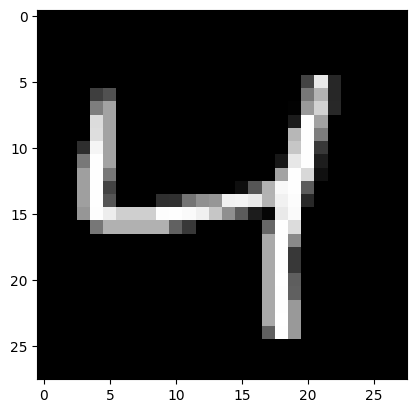

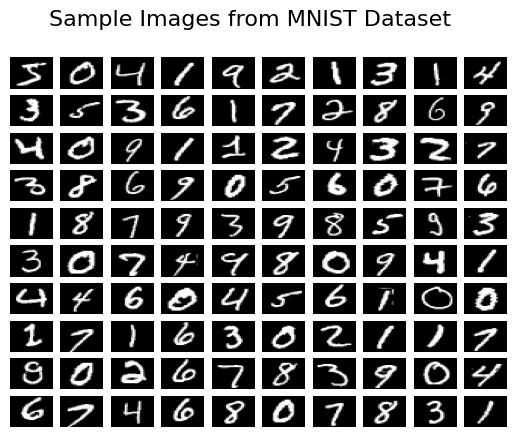

In [5]:
## Visaulize the data
plt.imshow(X_train[2],cmap='gray')
plt.show()
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_train[k].reshape(28, 28), aspect='auto', cmap='gray')
        ax[i][j].axis('off')  # Hide axes for better visualization
        k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

## Step 3: Data pre-processing


In [6]:
### Normalize the pixel values
### 255 is the maximum pixel value
X_train=X_train/255
X_test=X_test/255

In [7]:
## One-hot encoding the labels ( this is only required for multi-class classification)
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
## 10 classes with 0 and 1 encoding
y_test.shape

(10000, 10)

In [8]:
y_test.shape

(10000, 10)

### Step 4: Build neural network

In [9]:
model=Sequential([
    ### Number of features 28*28 = 784
    Flatten(input_shape=(28,28)),
    ### Hidden layer 1
    Dense(128,activation='relu'),
    ### Output layer
    Dense(10,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Train the neural network

In [17]:
## batch_size controls the computational complexity of the alogorithm and it does not have an impact on the output
history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.9797 - val_loss: 0.0973
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9785 - val_loss: 0.1094
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9807 - val_loss: 0.1020


### Step 6: Evaluate the model

In [18]:
test_loss,test_acc=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1311


In [19]:
predictions=model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Visualize the pixels from the train set

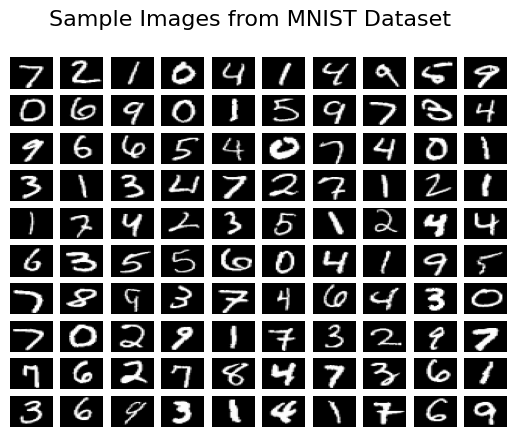

In [20]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_test[k].reshape(28, 28), aspect='auto', cmap='gray')
        ax[i][j].axis('off')  # Hide axes for better visualization
        k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()


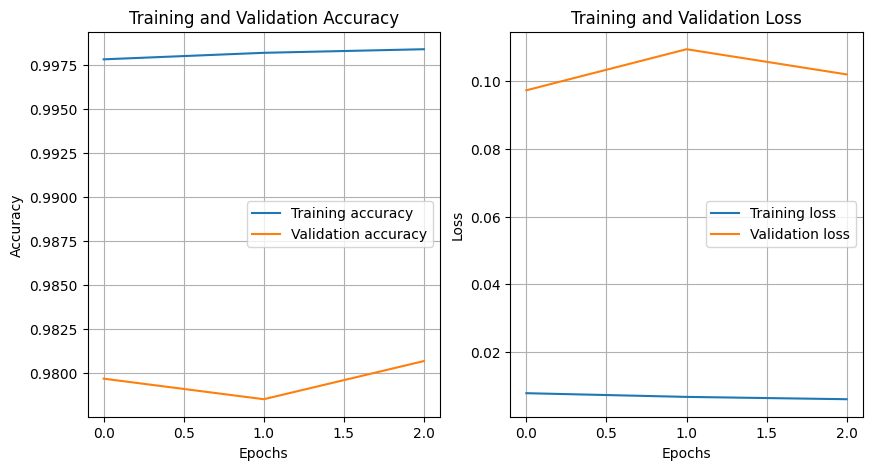

In [21]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(history.history['accuracy'],label='Training accuracy')
ax[0].plot(history.history['val_accuracy'],label='Validation accuracy')
ax[0].set_xlabel('Epochs')
# ax[0].set_ylim([0.8,1])
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].grid()

ax[1].plot(history.history['loss'],label='Training loss')
ax[1].plot(history.history['val_loss'],label='Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim([0,0.4])
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].grid()

plt.show()